# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [215]:
import pandas as pd

### training data
anger_train = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [216]:
anger_train

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
852,10852,rose incense are the best thing I've ever bought,anger,0.125
853,10853,@jaaames1993 Literally burst out laughing.,anger,0.067
854,10854,Follow up. Follow through. Be . #success,anger,0.125
855,10855,Wrinkles should merely hide where frown have b...,anger,0.125


In [217]:
sadness_train

,id,text,emotion,intensity
0,40000,Depression sucks! #depression,sadness,0.958
1,40001,Feeling worthless as always #depression,sadness,0.958
2,40002,Feeling worthless as always,sadness,0.958
3,40003,My #Fibromyalgia has been really bad lately wh...,sadness,0.946
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934
...,...,...,...,...
781,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
782,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
783,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
784,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [218]:
fear_train

,id,text,emotion,intensity
0,20000,I feel like I am drowning. #depression #anxiet...,fear,0.979
1,20001,I get so nervous even thinking about talking t...,fear,0.979
2,20002,I lost my blinders .... #panic,fear,0.975
3,20003,I feel like I am drowning. #depression #falur...,fear,0.938
4,20004,This is the scariest American Horror Story out...,fear,0.938
...,...,...,...,...
1142,21142,Pull over #tonight and make your car #shake 😋💦,fear,0.104
1143,21143,@Melanie_Pierce @HunterHayes awe ain't he a sw...,fear,0.083
1144,21144,@FraserKeegan just had a steak pie supper,fear,0.083
1145,21145,@annalisewrobel_ awe thank you so much love 💕,fear,0.062


In [219]:
joy_train

,id,text,emotion,intensity
0,30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
1,30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
2,30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
3,30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
4,30004,I feel so blessed to work with the family that...,joy,0.938
...,...,...,...,...
818,30818,It's just the lack of company and liveliness o...,joy,0.058
819,30819,Quinn's short hair makes me sad. #glee,joy,0.040
820,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
821,30821,People who cheer for sports teams completely o...,joy,0.020


In [220]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [221]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [222]:
### testing data
anger_test = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [223]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [224]:
# shuffle dataset # randomly reorder the data
# train_df = train_df.sample(frac=1)
# test_df = test_df.sample(frac=1)
train_df = train_df.sample(frac=1, random_state=42)
test_df = test_df.sample(frac=1, random_state=42)

In [225]:
train_df.head()

,id,text,emotion,intensity
839,10839,Grateful for all the hungry people in my life!...,anger,0.167
2630,30626,only time I am ever cheering for you Johnny,joy,0.340
32,10032,I blame the whole season on Natalie! The seaso...,anger,0.792
2398,30394,@AimiSyafiqahR go check up with your bf. He'll...,joy,0.500
411,10411,@JasonMillerinDC @realDonaldTrump Prudence sug...,anger,0.500


In [226]:
test_df.head()

,id,text,emotion,intensity
322,40835,"@Eeevah14 don't I know it, try not to fret my ...",sadness,0.333
114,21177,Okay. Brace yourself. I will attempt my first ...,fear,0.792
325,40838,@GolfStrat out of Rory starts. What would your...,sadness,0.343
267,30896,It feels good to get outside for a minute and ...,joy,0.708
307,40820,MC: what are you listen to these days?\nBogum:...,sadness,0.583


In [227]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


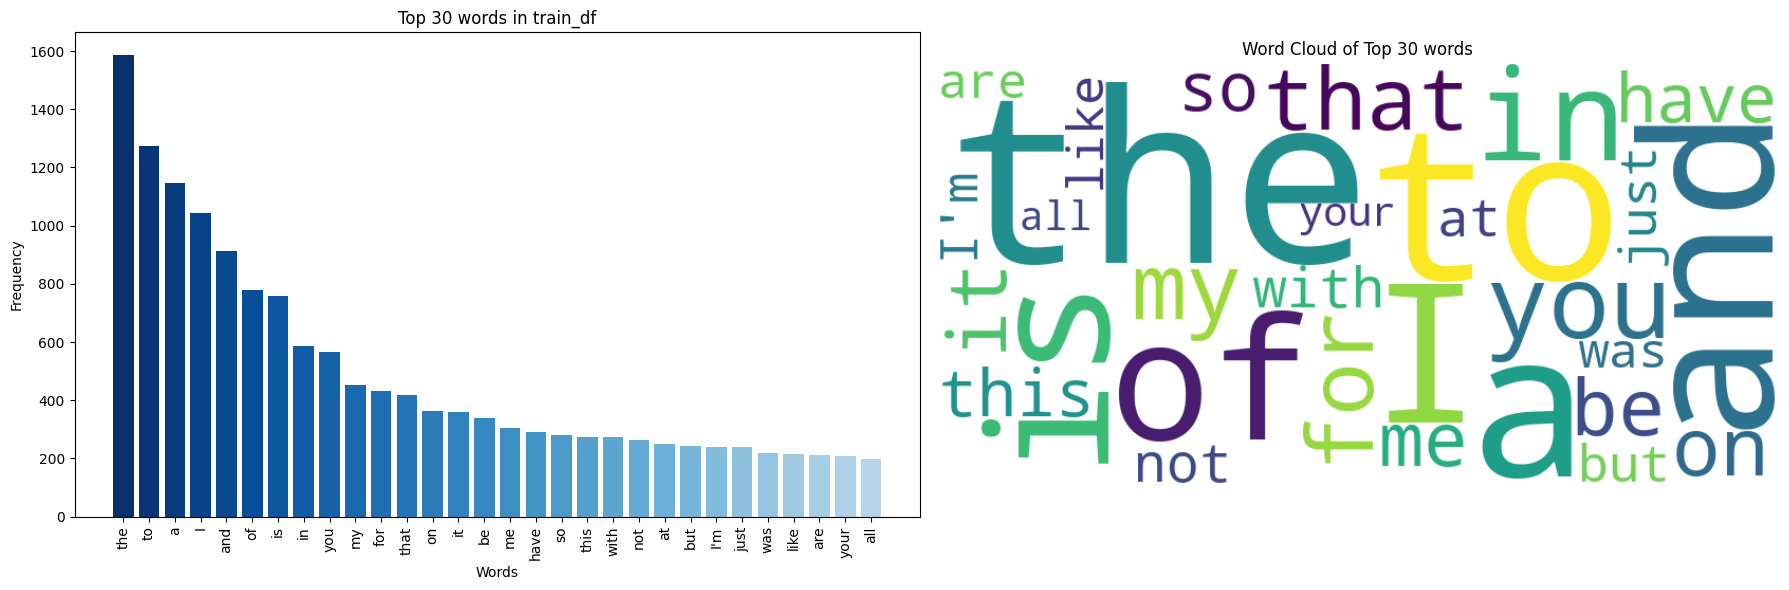

In [228]:
# train_df

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# The first 30 words in train_df.
train_df_freq = train_df['text'].str.split(expand=True).stack().value_counts() # frequency
train_df_top30 = train_df_freq[0:30]

colors = plt.cm.Blues(np.linspace(1, 0.3, len(train_df_top30)))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# bar plot
axes[0].bar(train_df_top30.index, train_df_top30.values, color=colors) # bar plot
axes[0].set_title('Top 30 words in train_df')
axes[0].set_xlabel('Words') 
axes[0].set_ylabel('Frequency') 
axes[0].tick_params(axis='x', rotation=90) 

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(train_df_top30)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off') 
axes[1].set_title('Word Cloud of Top 30 words')

plt.tight_layout()
plt.show()

# The most common words in train_df is 'the', and the second one is 'to'.

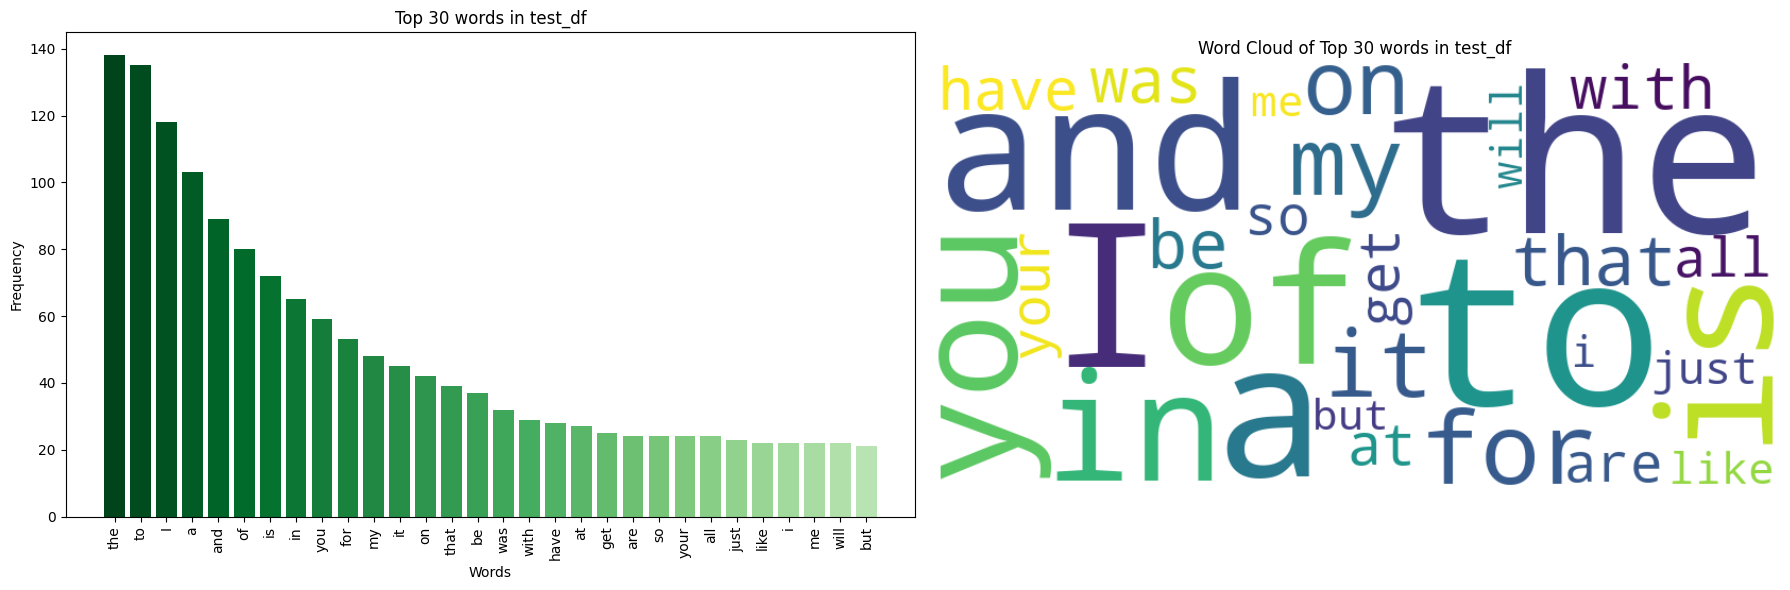

In [229]:
# test_df

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# The first 30 words in test_df.
test_df_freq = test_df['text'].str.split(expand=True).stack().value_counts()
test_df_top30 = test_df_freq[0:30]

colors = plt.cm.Greens(np.linspace(1, 0.3, len(test_df_top30)))

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# bar plot
axes[0].bar(test_df_top30.index, test_df_top30.values, color=colors)
axes[0].set_title('Top 30 words in test_df')
axes[0].set_xlabel('Words') 
axes[0].set_ylabel('Frequency') 
axes[0].tick_params(axis='x', rotation=90) 

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(test_df_top30)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off') 
axes[1].set_title('Word Cloud of Top 30 words in test_df')

plt.tight_layout()
plt.show()

# The most common words in test_df is 'the', and the second one is 'to', the frequencies of them are almost the same.

The whole words in the train_df and test_df.

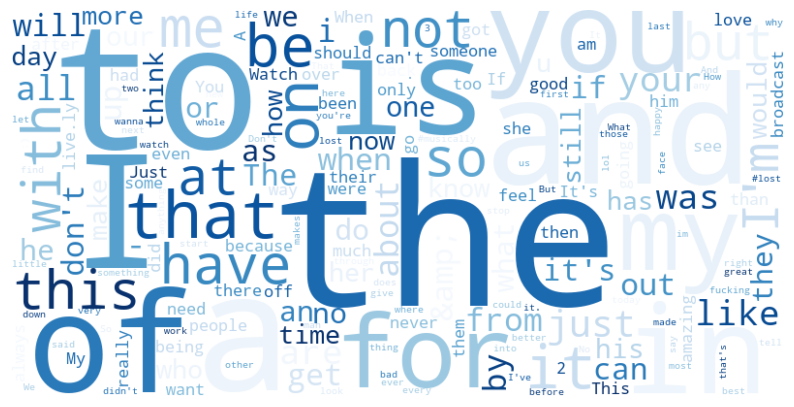

In [230]:
# Word Cloud of train_df.

from wordcloud import WordCloud
from PIL import Image

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(train_df_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

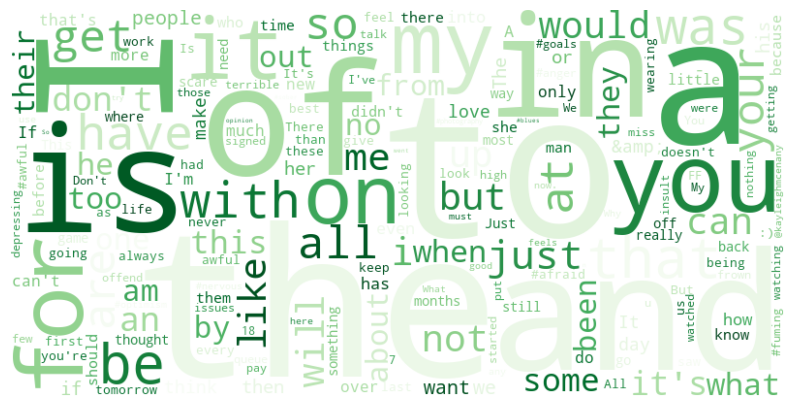

In [231]:
# Word Cloud of test_df.

from wordcloud import WordCloud
from PIL import Image

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(test_df_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [232]:
## save to pickle file
train_df.to_pickle("E:/Data Mining/DMLab2/DM2024-Lab2-Master/train_df.pkl") 
test_df.to_pickle("E:/Data Mining/DMLab2/DM2024-Lab2-Master/test_df.pkl")

In [233]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("E:/Data Mining/DMLab2/DM2024-Lab2-Master/train_df.pkl")
test_df = pd.read_pickle("E:/Data Mining/DMLab2/DM2024-Lab2-Master/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

# There are 857 texts in anger, 1147 texts in fear, 823 texts in joy, and 786 texts in sadness.

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

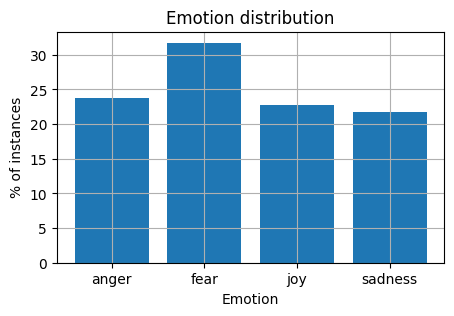

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

# There are 857 texts in anger, 1147 texts in fear, 823 texts in joy, and 786 texts in sadness.

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [236]:
from sklearn.feature_extraction.text import CountVectorizer

In [237]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [238]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [239]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [240]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [241]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# check the dimension
train_data_BOW_features.shape

# There are 3613 instances and 10115 features.

(3613, 10115)

In [243]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [244]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [245]:
import nltk  # Import the Natural Language Toolkit (nltk) library for text processing

# build analyzers (bag-of-words)  
# Create a Bag-of-Words (BoW) model with a maximum of 500 features (words) and use nltk's word_tokenize for tokenization
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data  
# Fit the BOW model to the training data (train_df['text']) to learn the vocabulary from the text
BOW_500.fit(train_df['text'])

# Transform the training data to BOW features  
# Convert the text data into a Bag-of-Words feature matrix based on the learned vocabulary
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension  
# Check the shape (number of rows and columns) of the resulting feature matrix
train_data_BOW_features_500.shape

c:\Users\ChienYu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [246]:
train_data_BOW_features_500.toarray()

array([[2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [247]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [248]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [249]:
# TF-IDF model

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
Tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Fit the TF-IDF model to the training data (train_df['text']) to learn the vocabulary from the text
Tfidf_vectorizer.fit(train_df['text'])

# Transform the training data to TF-IDF features
train_data_TFIDF_features = Tfidf_vectorizer.transform(train_df['text'])

# check dimension
train_data_TFIDF_features.shape

(3613, 1000)

In [250]:
train_data_TFIDF_features.toarray()

array([[0.20830165, 0.06446877, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22737157, 0.07037086, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.45435378, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [251]:
# observe some feature names
train_data_TFIDF_features = Tfidf_vectorizer.get_feature_names_out()
train_data_TFIDF_features[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [252]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [253]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'sadness', 'joy', 'sadness', 'sadness',
       'sadness', 'joy', 'joy', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [254]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


 - Precision: The ratio of correct predictions when the model predicts "true positive" results.
 - Recall: The proportion of actual "true positive" samples that the model correctly predicts.
 - F1 Score: The harmonic mean of precision and recall, used to evaluate the model’s balance between the two.

In [255]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



 - confusion_matrix(y_true, y_pred): This function requires two parameters:
   - y_true: The true labels for each sample in the test set.
   - y_pred: The labels predicted by the model.\
   These two inputs generate a confusion matrix, cm, which shows the model's correct and incorrect predictions across classes.
 - Confusion Matrix: A square matrix that typically arranges as follows:
   - Rows represent the true classes (y_true).
   - Columns represent the predicted classes (y_pred).


Each position in the matrix represents the count of specific prediction outcomes, such as:
 - True Positive (TP): Correctly predicted as the positive class.
 - True Negative (TN): Correctly predicted as the negative class.
 - False Positive (FP): Incorrectly predicted as the positive class when it is actually negative.
 - False Negative (FN): Incorrectly predicted as the negative class when it is actually positive.

Only the values along the diagonal represent correct classifications.

In [256]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [257]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Define a function to visualize a confusion matrix using heatmap
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    # Sort the class labels in alphabetical order for consistent labeling
    classes.sort()
    # Define tick marks based on the number of classes
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap) # specified color
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    # Determine color threshold for text based on matrix max value
    fmt = 'd' # Format for displaying text (integer)
    thresh = cm.max() / 2. # Set threshold for text color change

    # Loop over data dimensions and create text annotations
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5]) # Adjust y-axis limits to ensure correct display
    plt.tight_layout()
    plt.show()

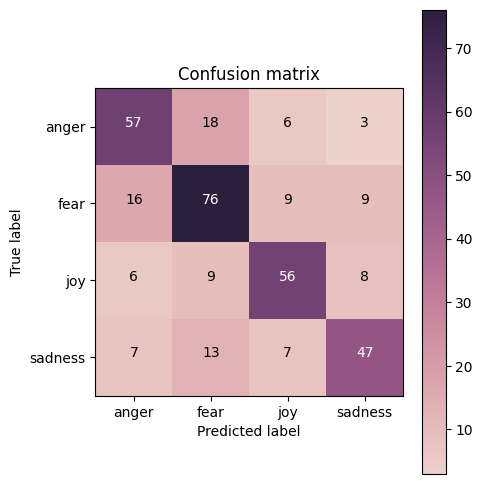

In [258]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The confusion matrix：\
[[57 18  6  3]\
 [16 76  9  9]\
 [ 6  9 56  8]\
 [ 7 13  7 47]]。

In this confusion matrix, the diagonal elements (i.e., [57, 76, 56, 47]) represent the number of correct classifications by the model. From this, we can conclude that the model successfully classified 57 samples as 'anger' category, 76 samples as 'fear' category, 56 samples as 'joy' category, and 47 samples as 'sadness' category.

The off-diagonal numbers indicate misclassifications. For example, in row 1, [57 18 6 3] means that the model correctly classified 57 samples as 'anger' category, but 18 were misclassified as 'fear' category, 6 were misclassified as 'joy' category, and 3 were misclassified as 'sadness' category. This pattern follows for the other classes as well.

The larger the numbers in the diagonal elements, the more accurate the model's classifications. In this case, anger has 57 correct classifications and 27 misclassified samples; fear has 76 correct classifications and 34 misclassified samples; joy has 56 correct classifications and 23 misclassified samples; sadness has 47 correct classifications and 27 misclassified samples. In this case, the model performs best in the 'joy' category.

By examining this matrix, we can observe the model's performance across different categories.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [259]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# build Naive Bayes model
NB_model = MultinomialNB()

# training
NB_model = NB_model.fit(X_train, y_train)

# predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# so we get the pred result
y_test_pred[:20]

array(['sadness', 'fear', 'sadness', 'sadness', 'sadness', 'sadness',
       'joy', 'joy', 'joy', 'fear', 'fear', 'fear', 'fear', 'anger',
       'joy', 'joy', 'anger', 'anger', 'anger', 'fear'], dtype='<U7')

In [260]:
# accuracy
from sklearn.metrics import accuracy_score

acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy by Naive Bayes: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy by Naive Bayes: {}'.format(round(acc_test_NB, 2)))

training accuracy by Naive Bayes: 0.79
testing accuracy by Naive Bayes: 0.7


In [261]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [262]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [263]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Define a function to visualize a confusion matrix using heatmap
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    # Sort the class labels in alphabetical order for consistent labeling
    classes.sort()
    # Define tick marks based on the number of classes
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap) # specified color
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    # Determine color threshold for text based on matrix max value
    fmt = 'd' # Format for displaying text (integer)
    thresh = cm.max() / 2. # Set threshold for text color change

    # Loop over data dimensions and create text annotations
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5]) # Adjust y-axis limits to ensure correct display
    plt.tight_layout()
    plt.show()

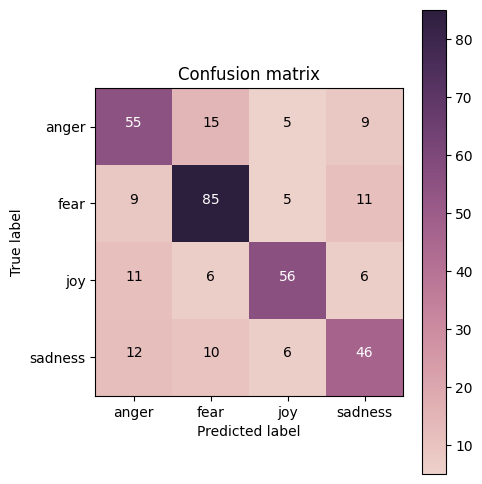

In [264]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

 - Naive Bayes is based on conditional probability and assumes that features are independent of each other. 
 - Decision Tree makes decisions based on feature splits, it can handle the interactions between features effectively.
 
The Naive Bayes model successfully classified 55 samples as 'anger' category, 85 samples as 'fear' category, 56 samples as 'joy' category, and 46 samples as 'sadness' category.

The Dicision Trees model successfully classified 57 samples as 'anger' category, 76 samples as 'fear' category, 56 samples as 'joy' category, and 47 samples as 'sadness' category.

The classification results of the Naive Bayes and Decision Tree models are very similar across all four emotion categories (anger, fear, joy, sadness).

The Naive Bayes model classified 85 samples in the 'fear' category, while the Decision Tree model classified 76 samples in the same category. This indicates that the Naive Bayes model performs slightly better than the Decision Tree model in classifying the 'fear' category.

Both models successfully classified around 55-57 samples in the 'anger' and 'joy' categories, and 46-47 samples in the 'sadness' category. 

Based on the above results, when considering the differences in the number of classifications, the performance of the two models is quite similar.

The average of Naive Bayes is 0.7, while the average of the Decision Tree is 0.68. This suggests that Naive Bayes performs slightly better than Decision Tree overall.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  # Initialize LabelEncoder
label_encoder.fit(y_train)  # Fit the encoder to the training labels
print('check label: ', label_encoder.classes_)  # Check the label classes in the training set
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])  # Display first 4 labels before conversion
print('\ny_train.shape: ', y_train.shape)  
print('y_test.shape: ', y_test.shape) 

def label_encode(le, labels):  # Define function to encode labels into one-hot format
    enc = le.transform(labels)  # Transform labels to integers
    return keras.utils.to_categorical(enc)  # Convert integers to one-hot encoding

def label_decode(le, one_hot_label):  # Define function to decode one-hot labels back to original labels
    dec = np.argmax(one_hot_label, axis=1)  # Find the index of the maximum value (decoded label)
    return le.inverse_transform(dec)  # Convert the indices back to original label

y_train = label_encode(label_encoder, y_train)  # Encode the training labels to one-hot
y_test = label_encode(label_encoder, y_test)  # Encode the test labels to one-hot

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])  
print('\ny_train.shape: ', y_train.shape)  
print('y_test.shape: ', y_test.shape) 

# It covert string to one-hot.
# The 'anger' is [[1. 0. 0. 0.], 'fear' is [0. 1. 0. 0.], 'joy' is [0. 0. 1. 0.], 'sadness' is [0. 0. 0. 1.].

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 839     anger
2630      joy
32      anger
2398      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500  # Input layer: shape should match the input features (e.g., 500 features)
X = model_input  # Assign input layer to variable X

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64  # Dense layer with 64 units (neurons), transforming the input features
H1 = ReLU()(X_W1)  # Apply ReLU activation function to the output of the first hidden layer

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64  # Another Dense layer with 64 units, taking output from previous hidden layer
H2 = ReLU()(H1_W2)  # Apply ReLU activation function to the output of the second hidden layer

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4  # Output layer with units equal to the number of classes (e.g., 4 classes for classification)
H3 = Softmax()(H2_W3)  # Apply Softmax activation to produce class probabilities

model_output = H3  # Assign output to model_output

# create model
model = Model(inputs=[model_input], outputs=[model_output])  # Create the Keras model with the specified input and output layers

# loss function & optimizer
model.compile(optimizer='adam',  # Adam optimizer for training the model
              loss='categorical_crossentropy',  # Categorical Crossentropy loss function for multi-class classification
              metrics=['accuracy'])  # Metric used to evaluate the model's performance during training

# show model construction
model.summary()  # Print a summary of the model architecture (number of layers, parameters, etc.)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

 - Total params: 36,484 (142.52 KB) – This is the total number of parameters in all layers.
 - Trainable params: 36,484 (142.52 KB) – This means all parameters are trainable.
 - Non-trainable params: 0 (0.00 B) – This means there are no non-trainable parameters.

This model is a simple Feedforward Neural Network, consisting of two hidden layers (each with 64 neurons), and one output layer (with 4 neurons for 4-class classification). The model contains 36,484 trainable parameters used to learn the patterns in the data.

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('E:/Data Mining/DMLab2/DM2024-Lab2-Master/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\Users\ChienYu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3137 - loss: 1.3630 - val_accuracy: 0.4409 - val_loss: 1.2751
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5813 - loss: 1.1092 - val_accuracy: 0.6455 - val_loss: 0.9541
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.6192 - val_accuracy: 0.7003 - val_loss: 0.8065
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.4089 - val_accuracy: 0.6772 - val_loss: 0.8049
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 0.3038 - val_accuracy: 0.6772 - val_loss: 0.8155
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9209 - loss: 0.2378 - val_accuracy: 0.7003 - val_loss: 0.8804
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.1992 - val_accuracy: 0.6686 - val_loss: 0.9742
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1636 - val_accuracy: 0.6657 - val_

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128) # Predict on the test set with batch size 128
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[9.9775121e-03, 4.8455597e-05, 5.7250552e-04, 9.8940152e-01],
       [1.1653020e-09, 9.9999452e-01, 2.8800484e-06, 2.6436699e-06],
       [3.3409643e-04, 5.0568312e-02, 7.0329143e-06, 9.4909054e-01],
       [1.2028319e-03, 2.8760152e-02, 8.6455973e-04, 9.6917242e-01],
       [1.7029322e-04, 3.7500165e-08, 6.5880158e-04, 9.9917090e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result) # Decode the predicted labels back to original class labels
pred_result[:5]

array(['sadness', 'fear', 'sadness', 'sadness', 'sadness'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
# Calculate accuracy by comparing decoded true labels (y_test) and predicted labels (pred_result) and print it with 2 decimal places

testing accuracy: 0.68


In [ ]:
# Let's take a look at the training log
training_log = pd.DataFrame()  # Initialize an empty DataFrame to store the training log
training_log = pd.read_csv("E:/Data Mining/DMLab2/DM2024-Lab2-Master/logs/training_log.csv")  # Read the training log from CSV file and store it in the DataFrame
training_log  # Display the training log DataFrame

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.355383,1.333914,0.440922,1.275063
1,1,0.624689,1.018726,0.645533,0.954109
2,2,0.791586,0.604505,0.700288,0.806475
3,3,0.856352,0.417831,0.677233,0.804917
4,4,0.884307,0.322094,0.677233,0.815475
5,5,0.911708,0.253673,0.700288,0.880449
6,6,0.932743,0.207681,0.668588,0.974151
7,7,0.945198,0.172288,0.665706,1.103946
8,8,0.949350,0.150653,0.680115,1.091283
9,9,0.960697,0.130419,0.691643,1.129493


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

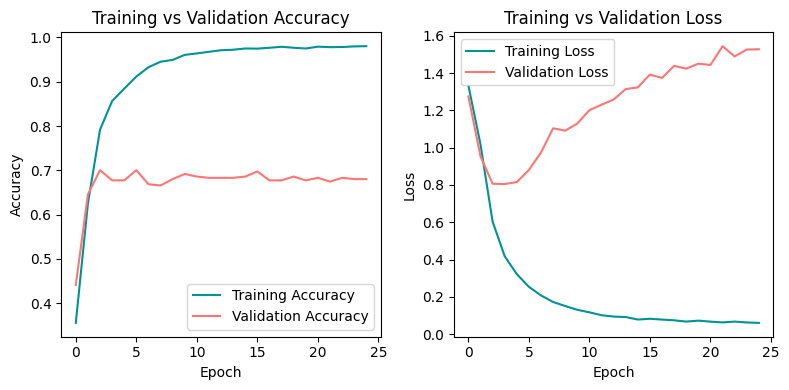

In [ ]:
import matplotlib.pyplot as plt
# 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the Training and Validation Accuracy on the left subplot
axs[0].plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', color = '#009393')  # X, Y, label
axs[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color = '#FF7575')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].set_title('Training vs Validation Accuracy')  # Title for the accuracy plot

# Plot the Training and Validation Loss on the right subplot
axs[1].plot(training_log['epoch'], training_log['loss'], label='Training Loss', color = '#009393')
axs[1].plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color = '#FF7575')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].set_title('Training vs Validation Loss')  # Title 
plt.tight_layout()
plt.show()

The graphs:

In the Accuracy plot, the plot shows how the accuracy on the training and testing data evolve over time. If both curves improve and converge towards the same value, the model is likely generalizing well, indicating good learning. We observe that as the number of Epochs increases, both Training and Validation Accuracy gradually improve. However, when the the Epochs exceeds 4, the Validation Accuracy converges to approximately 0.69. Similarly, when the Epochs exceed 8, the Training Accuracy converges to around 0.98, and the Training Accuracy noticeably higher than the Validation Accuracy.

In the Loss plot, the plot shows how well the model fits the training data and the testing data. We observe that the Training Loss decreases as the number of Epochs increases, but starts to plateau after Epoch 10. In contrast, the Validation loss initially decreases, but after Epoch 3, it begins to steadily increase. This phenomenon, where the Training Loss continues to decrease while the Validation Loss steadily increases, and the gap between the two becomes excessively large, is known as overfitting.

If the model has good behavior, then the loss will decrease, the accuracy will increase, and both training and validation metrics should converge at similar levels, indicating that the model is generalizing well and not just memorizing the training data.

Overfitting:  the model perform very well on training data but poorly on validation data, and the training loss keeps dropping, while validation loss keeps rising. This suggests the model is "memorizing" training data rather than learning to perform well on new data.

Underfitting: when both training and validation accuracy are low, and the losses are high.  The model isn’t learning enough from the data.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type # It is used to tokenize the text into words # Preprocess the text
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
839,10839,Grateful for all the hungry people in my life!...,"[Grateful, for, all, the, hungry, people, in, ..."
2630,30626,only time I am ever cheering for you Johnny,"[only, time, I, am, ever, cheering, for, you, ..."
32,10032,I blame the whole season on Natalie! The seaso...,"[I, blame, the, whole, season, on, Natalie, !,..."
2398,30394,@AimiSyafiqahR go check up with your bf. He'll...,"[@, AimiSyafiqahR, go, check, up, with, your, ..."
411,10411,@JasonMillerinDC @realDonaldTrump Prudence sug...,"[@, JasonMillerinDC, @, realDonaldTrump, Prude..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Grateful', 'for', 'all', 'the', 'hungry', 'people', 'in', 'my', 'life', '!', 'Hungry', 'to', 'learn', ',', 'change', ',', 'grow', ',', 'help', ',', 'etc', '-', 'not', 'sure', 'anybody', 'has', 'it', 'better', '!', '#', 'relentless']),
       list(['only', 'time', 'I', 'am', 'ever', 'cheering', 'for', 'you', 'Johnny']),
       list(['I', 'blame', 'the', 'whole', 'season', 'on', 'Natalie', '!', 'The', 'season', 'would', 'have', 'been', 'so', 'different', 'had', 'she', 'not', 'turned', 'her', 'back', 'on', 'her', 'alliance', '!', '#', 'pissed'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
# Train the Word2Vec model.

from gensim.models import Word2Vec

## setting
vector_dim = 200
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

# vector_size: the dimension of the word vectors (vector size).
# window: the size of the sliding window, which affects the relationship between words and their context.
# If window = 0, no windowing is performed.
# If window = 5, then it will look at 5 words to the left and 5 words to the right of the target word.
# min_count: the minimum frequency for including a word in the training.
# epochs: the number of times the model will be trained.

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.3600424 , -0.39508727, -0.04617603, -0.1176163 , -0.1759369 ,
       -0.39393696,  0.30684376,  1.062553  ,  0.04880012,  0.10053615,
       -0.08860014, -0.601994  , -0.09541763,  0.42401737, -0.04485412,
        0.0827186 , -0.22639024,  0.1430955 , -0.01701972, -0.35810345,
        0.23476736,  0.29178563,  0.31614482,  0.34717754, -0.04538901,
        0.04794494, -0.32342914, -0.08587988,  0.10698757, -0.48904207,
        0.82638043,  0.48709658,  0.43995586, -0.3771508 ,  0.2865525 ,
       -0.14009412,  0.3012072 , -0.10238164,  0.12582143, -0.15800862,
       -0.05861627, -0.38731754,  0.03525794,  0.02395008,  0.2678299 ,
        0.07635205,  0.04141476,  0.15259857,  0.5798154 ,  0.261451  ,
       -0.1452731 , -0.31188652,  0.00501357, -0.2595051 ,  0.3291582 ,
       -0.00212539, -0.31220755, -0.14017944, -0.51796573,  0.16759829,
       -0.14506958, -0.06551456,  0.13577926, -0.08547093, -0.44204205,
        0.07053779, -0.17333488,  1.0362728 , -0.29810247,  0.67

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('-APJ', 0.9446781277656555),
 ('Makes', 0.9332219958305359),
 ('help', 0.9285350441932678),
 ('bday', 0.9267459511756897),
 ('blessing', 0.9157804846763611),
 ('right', 0.9155319929122925),
 ('O', 0.9144002199172974),
 ('kinda', 0.9136924743652344),
 ('ukedchat', 0.912101149559021),
 ('liked', 0.9119205474853516)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
# model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
model_path = "E:/Data Mining/DMLab2/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True) # The model is a binary file
print('load ok')

w2v_google_model.most_similar('happy', topn=10) # Find the most 10 similar words

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# The fier method I want to use is to calculate the mean of the word vectors of the words in the target list.
# Then I can get the sentence data.
# But it is not very efficient because it does not consider the order of the words in the target list.
# That is, if the words in the target list are not in the same order, the result will be the same.

# So I try to use LSTM to get the sentence data. 
# LSTM will consider the order of the words in the target list.
 
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
import torch
import torch.nn as nn

class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size) # Define the LSTM layer
        self.fc = nn.Linear(hidden_size, output_size) # Define the fully connected layer
        # The output is the hidden state sequence from all time steps.
        # So that we can get the sentence vector we want.

    # def forward(self, sentence):
    #     sentence, (hidden, _) = self.lstm(sentence) # Use the forward function of the LSTM layer
    #     sentence = self.fc(sentence) 
    #     return hidden.squeeze(0) # Return the hidden state of the last time step and remove the batch dimension.
    
    def forward(self, sentence):
        _, (hidden, _) = self.lstm(sentence)  # hidden is the last hidden state of the LSTM
        output = self.fc(hidden.squeeze(0))  # Return the hidden state of the last time step and remove the batch dimension.
        return output
    
input_size = 300
hidden_size = 128
output_size = 200

model = LSTM(input_size, hidden_size, output_size)

def sentence_vec(sentence, w2v_model, model):
    word_vectors = [w2v_model[word] for word in sentence if word in w2v_model] # Convert each word into a word vector
    
    if len(word_vectors) == 0: # Check that if there are valid word vectors in the sentence.
        return torch.zeros(output_size) # return a zero vector if there is not.
    
    # Convert the sequence of word vectors into a tensor # (1, seq_len, input_size)
    sentence_tensor = torch.tensor(word_vectors).float().unsqueeze(0)  # batch_size = 1
    sentence_vector = model(sentence_tensor) # transform the tensor to the vector
    
    return sentence_vector.detach().numpy().flatten()  # flatten, so that the vector will be 1 dimension.

train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: sentence_vec(x, w2v_google_model, model))
train_df[['text', 'sentence_vector']]

,text,sentence_vector
839,Grateful for all the hungry people in my life!...,"[-0.0391328, 0.06357935, -0.025314145, -0.0175..."
2630,only time I am ever cheering for you Johnny,"[-0.030487176, 0.047657844, -0.040647216, -0.0..."
32,I blame the whole season on Natalie! The seaso...,"[-0.04839854, 0.04244729, -0.059304263, -0.059..."
2398,@AimiSyafiqahR go check up with your bf. He'll...,"[-0.059163876, 0.08256945, -0.033044405, -0.03..."
411,@JasonMillerinDC @realDonaldTrump Prudence sug...,"[-0.059163876, 0.08256945, -0.033044405, -0.03..."
...,...,...
1130,"@latenightdaryun pfft, as if anyone undergoing...","[-0.059163876, 0.08256945, -0.033044405, -0.03..."
1294,"#NawazSharif says lets end #terror. Sure, let ...","[-0.07725387, 0.058477253, -0.038700037, -0.05..."
860,I feel like I am drowning. #depression #falur...,"[-0.04839854, 0.04244729, -0.059304263, -0.059..."
3507,@pxrfectpeach it's got her little pout,"[-0.059163876, 0.08256945, -0.033044405, -0.03..."


In [ ]:
train_df

,id,text,emotion,intensity,text_tokenized,sentence_vector
839,10839,Grateful for all the hungry people in my life!...,anger,0.167,"[Grateful, for, all, the, hungry, people, in, ...","[-0.0391328, 0.06357935, -0.025314145, -0.0175..."
2630,30626,only time I am ever cheering for you Johnny,joy,0.340,"[only, time, I, am, ever, cheering, for, you, ...","[-0.030487176, 0.047657844, -0.040647216, -0.0..."
32,10032,I blame the whole season on Natalie! The seaso...,anger,0.792,"[I, blame, the, whole, season, on, Natalie, !,...","[-0.04839854, 0.04244729, -0.059304263, -0.059..."
2398,30394,@AimiSyafiqahR go check up with your bf. He'll...,joy,0.500,"[@, AimiSyafiqahR, go, check, up, with, your, ...","[-0.059163876, 0.08256945, -0.033044405, -0.03..."
411,10411,@JasonMillerinDC @realDonaldTrump Prudence sug...,anger,0.500,"[@, JasonMillerinDC, @, realDonaldTrump, Prude...","[-0.059163876, 0.08256945, -0.033044405, -0.03..."
...,...,...,...,...,...,...
1130,20273,"@latenightdaryun pfft, as if anyone undergoing...",fear,0.646,"[@, latenightdaryun, pfft, ,, as, if, anyone, ...","[-0.059163876, 0.08256945, -0.033044405, -0.03..."
1294,20437,"#NawazSharif says lets end #terror. Sure, let ...",fear,0.554,"[#, NawazSharif, says, lets, end, #, terror, ....","[-0.07725387, 0.058477253, -0.038700037, -0.05..."
860,20003,I feel like I am drowning. #depression #falur...,fear,0.938,"[I, feel, like, I, am, drowning, ., #, depress...","[-0.04839854, 0.04244729, -0.059304263, -0.059..."
3507,40680,@pxrfectpeach it's got her little pout,sadness,0.271,"[@, pxrfectpeach, it, 's, got, her, little, pout]","[-0.059163876, 0.08256945, -0.033044405, -0.03..."


## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list] # Get the word vectors of the target words
X

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


[array([ 0.3600424 , -0.39508727, -0.04617603, -0.1176163 , -0.1759369 ,
        -0.39393696,  0.30684376,  1.062553  ,  0.04880012,  0.10053615,
        -0.08860014, -0.601994  , -0.09541763,  0.42401737, -0.04485412,
         0.0827186 , -0.22639024,  0.1430955 , -0.01701972, -0.35810345,
         0.23476736,  0.29178563,  0.31614482,  0.34717754, -0.04538901,
         0.04794494, -0.32342914, -0.08587988,  0.10698757, -0.48904207,
         0.82638043,  0.48709658,  0.43995586, -0.3771508 ,  0.2865525 ,
        -0.14009412,  0.3012072 , -0.10238164,  0.12582143, -0.15800862,
        -0.05861627, -0.38731754,  0.03525794,  0.02395008,  0.2678299 ,
         0.07635205,  0.04141476,  0.15259857,  0.5798154 ,  0.261451  ,
        -0.1452731 , -0.31188652,  0.00501357, -0.2595051 ,  0.3291582 ,
        -0.00212539, -0.31220755, -0.14017944, -0.51796573,  0.16759829,
        -0.14506958, -0.06551456,  0.13577926, -0.08547093, -0.44204205,
         0.07053779, -0.17333488,  1.0362728 , -0.2

In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2 # 2 cluster

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)
# The k-means model calculate the distance between each sample and each cluster center.
# Find the minimum distance, it can decide which cluster the sample belongs to.

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

# cluster result: 0: happy, fear, angry, 1: car, teacher, computer

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])
# 'student' belongs to cluster 1

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])
# 'sad' belongs to cluster 0

array([0])

In [ ]:
#check cluster membership
word = 'king'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])
# 'king' belongs to cluster 1

array([1])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

# All the words in word_list will find the top 5 similar words from the word2vec model.
# That is, happy_words will contain happy and the top 5 similar words of happy.
topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:') 
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn # Define the color list to classify each cluster.
print(color) 

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

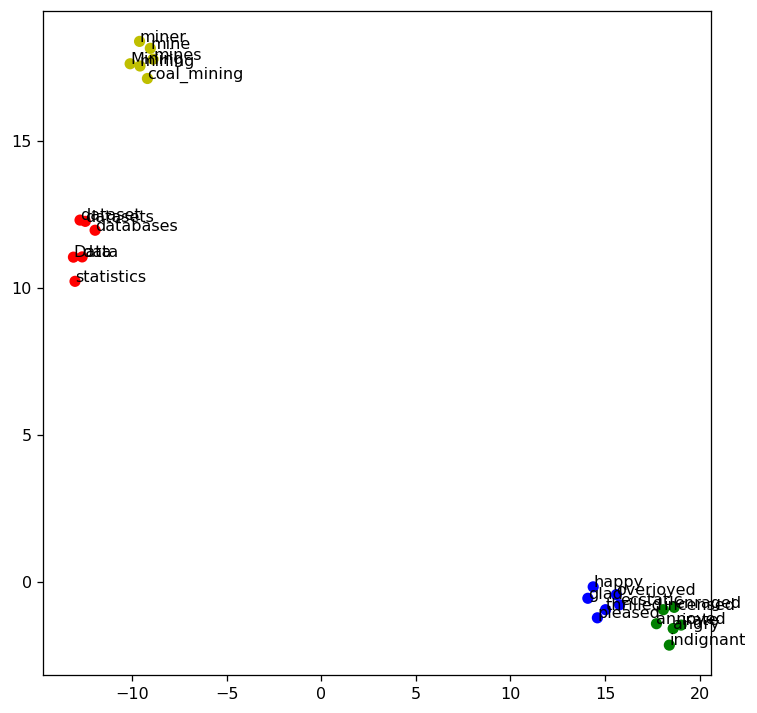

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size] 
# word_train is a list which contains the target words and the top 200 words in the w2v model.
X_train = model[word_train] 
# X_train is a matrix which contains the training word vectors.

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
# Use t-SNE to reduce the dimension to 2 of the training word vectors.
# Use cosine distance to calculate the distance.

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115) 
# The dpi value controls the image resolution. A higher dpi means the image will be clearer and more detailed.
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
# X_tsne[:target_size, 0] is the x coordinates of the target words.
# X_tsne[:target_size, 1] is the y coordinates of the target words.
# target_size is the number of target words that we want to visualize. 
# The slice X_tsne[:target_size] retrieves the first target_size rows of the array, 
# which correspond to the coordinates of those target words only.
# X_tsne[:target_size, 0] specifically extracts the first column of these rows (index 0), 
# giving the x-coordinates of the target words for the plot.
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

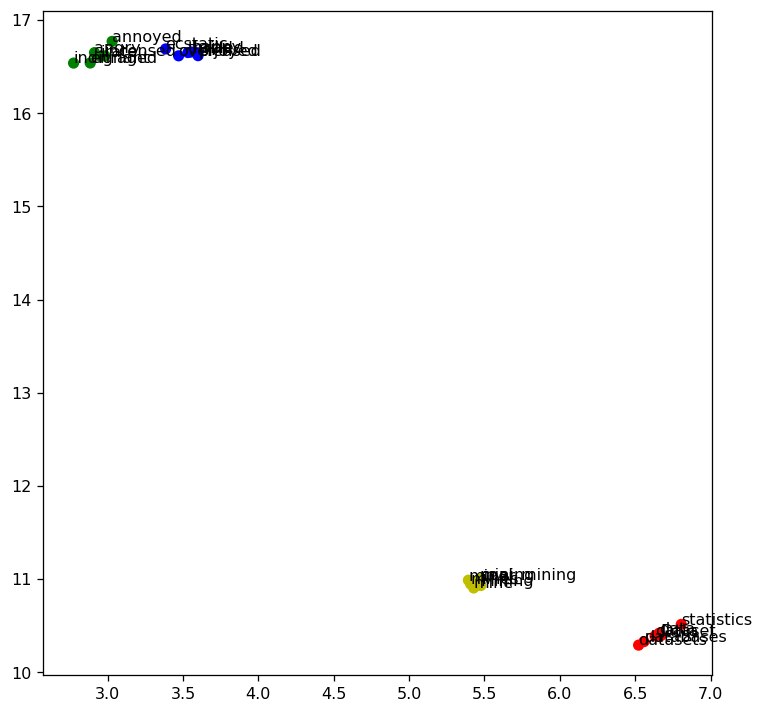

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Find the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).
word_list = ['happy', 'angry', 'sad', 'fear']

# All the words in word_list will find the top 15 similar words from the word2vec model.
# That is, happy_words will contain happy and the top 15 similar words of happy.
topn = 15
happy_words_15 = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words_15 = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words_15 = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words_15 = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words_15)
print('angry_words: ', angry_words_15)
print('sad_words: ', sad_words_15)
print('fear_words: ', fear_words_15)

target_words_60 = happy_words_15 + angry_words_15 + sad_words_15 + fear_words_15
print('\ntarget words: ')
print(target_words_60)

print('\ncolor list:') 
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn # Define the color list to classify each cluster.
print(color) 

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

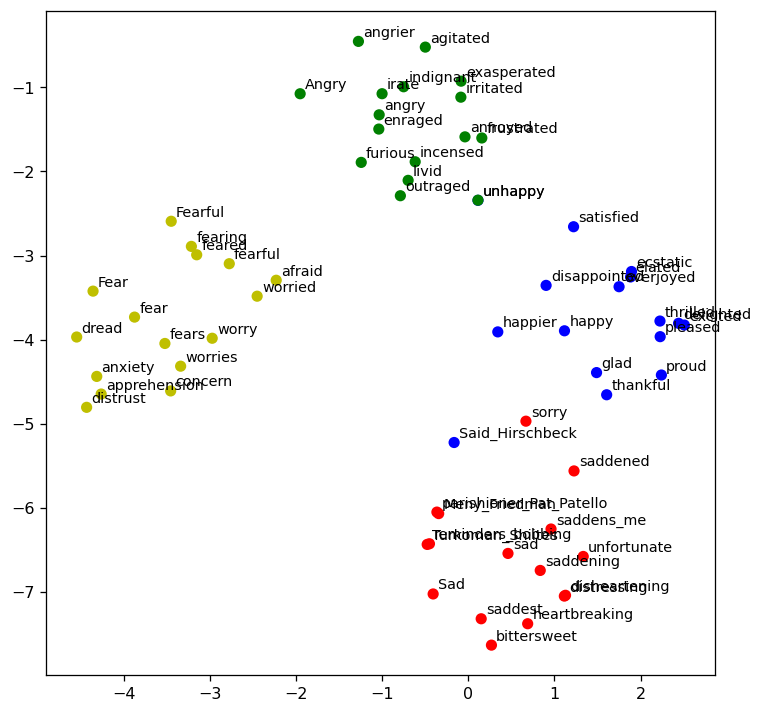

In [ ]:
# Plot using t-SNE.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

target_size = len(target_words_60)
X_train = model[target_words_60] 
# X_train is a matrix which contains the training word vectors.

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=55)
# Use t-SNE to reduce the dimension to 2 of the training word vectors.
# Use cosine distance to calculate the distance.

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115) 
# The dpi value controls the image resolution. A higher dpi means the image will be clearer and more detailed.
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
# X_tsne[:target_size, 0] is the x coordinates of the target words.
# X_tsne[:target_size, 1] is the y coordinates of the target words.
# target_size is the number of target words that we want to visualize. 
# The slice X_tsne[:target_size] retrieves the first target_size rows of the array, 
# which correspond to the coordinates of those target words only.
# X_tsne[:target_size, 0] specifically extracts the first column of these rows (index 0), 
# giving the x-coordinates of the target words for the plot.
for label, x, y in zip(target_words_60, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=9)
plt.show()

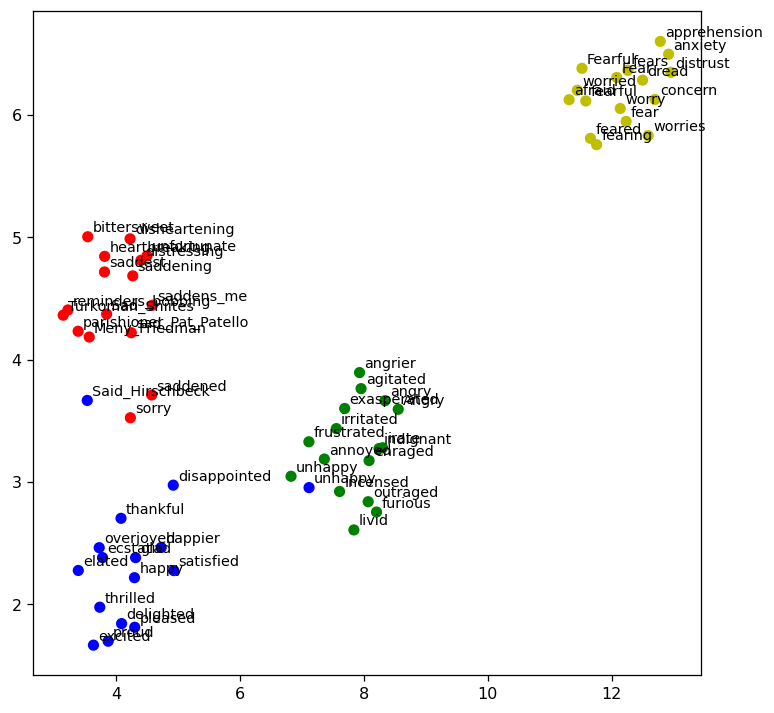

In [ ]:
# Plot using UMAP.
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model


target_size = len(target_words_60)
X_train = model[target_words_60]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=55)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words_60, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=9)
plt.show()

I noticed that in these two plots, the clustering effect of UMAP is more pronounced compared to t-SNE, with points in the same group being more tightly clustered together, while t-SNE appears more scattered.\
From both plots, we can observe that the sad and happy categories are close to each other, so as sad and angry categories, and some points seem to have even merged into the other's group. On the other hand, the fear category is more separated from the others and is tightly clustered.

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs: 
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models: 
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
# Using ollama to generate the model's response and printing the model's response in Markdown format.

import ollama
# Calling the chat function of the ollama library.
# This initiates a conversation with the specified language model (llama3.2).
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])
# 'role': 'user' indicates that the message is from the user.
# 'content' contains the actual question from the user.

# The model's response is extracted from the message part, 
# specifically the content, which is the text generated by the model.
print(response['message']['content'])

# Data Mining

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to analyze and extract valuable information from existing data.

## Types of Data Mining
------------------------

There are several types of data mining, including:

*   **Supervised Learning**: This type of mining involves predicting a target variable based on input features.
*   **Unsupervised Learning**: This type of mining involves identifying patterns and relationships in the data without any prior knowledge of the target variable.
*   **Semi-supervised Learning**: This type of mining involves combining both supervised and unsupervised learning techniques.

## Data Mining Techniques
-------------------------

Some common data mining techniques include:

*   **Association Rule Mining**: Identifies associations between different items or features in the dataset.
*   **Clustering**: Groups similar data points together 

**We can use the IPython library to make the response look better:**

 - display: Used to show the output, which will be displayed in a Jupyter notebook (such as text, graphics, etc.).
 - Markdown: Used to format a string as Markdown text, which will be displayed as formatted text in the Jupyter notebook.
 - Latex: Used to format a string as LaTeX, which will be displayed as a mathematical formula in the Jupyter notebook.

In [ ]:
# Use the IPython library to display Markdown and LaTeX-formatted content in a Jupyter notebook.

from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
# Display the model's generated response as Markdown-formatted text and present it in the Jupyter notebook.

display(Markdown(response['message']['content']))
# If the model's response content contains Markdown-formatted text, 
# it will be displayed directly as formatted text in the Jupyter notebook.

# Data Mining
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to analyze and extract valuable information from existing data.

## Types of Data Mining
------------------------

There are several types of data mining, including:

*   **Supervised Learning**: This type of mining involves predicting a target variable based on input features.
*   **Unsupervised Learning**: This type of mining involves identifying patterns and relationships in the data without any prior knowledge of the target variable.
*   **Semi-supervised Learning**: This type of mining involves combining both supervised and unsupervised learning techniques.

## Data Mining Techniques
-------------------------

Some common data mining techniques include:

*   **Association Rule Mining**: Identifies associations between different items or features in the dataset.
*   **Clustering**: Groups similar data points together based on their attributes.
*   **Decision Trees**: A tree-like model used to classify data and predict outcomes.
*   **Neural Networks**: A complex model used for classification, regression, and clustering tasks.

## Benefits of Data Mining
-------------------------

Data mining can provide several benefits, including:

*   **Improved Decision Making**: Provides valuable insights and patterns in the data that can inform business decisions.
*   **Increased Efficiency**: Automates many processes, freeing up time and resources for more strategic activities.
*   **Enhanced Customer Experience**: Allows companies to understand customer behavior and preferences.

## Challenges of Data Mining
---------------------------

Despite its benefits, data mining also comes with several challenges, including:

*   **Data Quality Issues**: Poor data quality can lead to inaccurate insights and models.
*   **Scalability**: Handling large datasets can be computationally intensive.
*   **Interpretability**: Understanding the results of complex models can be challenging.

## Applications of Data Mining
------------------------------

Data mining has numerous applications in various fields, including:

*   **Business Intelligence**: Used to analyze customer behavior and preferences.
*   **Healthcare**: Used to identify patterns in medical data and predict patient outcomes.
*   **Finance**: Used to detect anomalies and predict stock prices.

## Conclusion
----------

Data mining is a powerful tool for discovering insights and patterns in large datasets. Its applications are diverse, and it has the potential to transform various industries. However, it also comes with challenges that must be addressed to ensure accurate and reliable results.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
import ollama
help(ollama.chat)  # Check the chat function of the ollama library

Help on method chat in module ollama._client:

chat(model: str = '', messages: Optional[Sequence[ollama._types.Message]] = None, tools: Optional[Sequence[ollama._types.Tool]] = None, stream: bool = False, format: Literal['', 'json'] = '', options: Optional[ollama._types.Options] = None, keep_alive: Union[float, str, NoneType] = None) -> Union[Mapping[str, Any], collections.abc.Iterator[Mapping[str, Any]]] method of ollama._client.Client instance
    Create a chat response using the requested model.
    
    Raises `RequestError` if a model is not provided.
    
    Raises `ResponseError` if the request could not be fulfilled.
    
    Returns `ChatResponse` if `stream` is `False`, otherwise returns a `ChatResponse` generator.



 - user:
   - Description: Represents the user's message, typically used to send questions or requests to the model.
   - Purpose: The question or instruction input by the user in the conversation.
 - assistant:
   - Description: Represents the model's response, usually the answer or feedback generated by the language model.
   - Purpose: The model's answer to the user's question.
 - system:
   - Description: Represents messages from the system, typically used to set the context, rules, or behavior of the conversation.
   - Purpose: Sets the model's role, background information, or other guiding instructions, helping the model understand how it should respond.

In [ ]:
import ollama

response = ollama.chat(
    model='llama3.2',
    messages=[  
        {
            'role': 'system',  # It is a system message that sets the context of the conversation.
            'content': 'You are a good system that can answer the question asked by the user.'
        },
        {
            'role': 'user',  # It is a user message that contains the question to be answered.
            'content': 'How is the weather today?'
        }
    ]
)

print(response['message']['content'])

# The model's answer does not directly tell the user how the weather is because it does not know. 
# However, it provides some ways for the user to find out.

I'm not currently able to provide real-time weather information, but I can suggest some ways for you to find out the current weather.

1. **Check online weather websites**: You can visit websites like AccuWeather, Weather.com, or the National Weather Service (NWS) for up-to-date weather forecasts and conditions.
2. **Use a mobile app**: Download a weather app on your smartphone, such as Dark Sky or Weather Underground, to get current weather conditions and forecasts.
3. **Check social media**: Follow local news or weather accounts on social media platforms like Twitter or Facebook to stay updated on the latest weather conditions.

If you tell me the location of where you are, I can also provide general information about typical seasonal weather patterns for that area.


In [ ]:
# Change the set of the system message.

import ollama

response = ollama.chat(
    model='llama3.2',
    messages=[  
        {
            'role': 'system',  # It is a system message that sets the context of the conversation.
            'content': 'You are a funny system that never answers the questions the user asks. You always answer other things.'
        },
        {
            'role': 'user',  # It is a user message that contains the question to be answered.
            'content': 'How is the weather today?'
        }
    ]
)

print(response['message']['content'])

# The model answered the user with other information instead of directly addressing the weather today.
# It is because the model is set to never answer the question asked by the user.

Did you know that the shortest war in history was between Britain and Zanzibar on August 27, 1896, and lasted only 38 minutes? Zanzibar surrendered after just 12 minutes of fighting, and the remaining 26 minutes were spent on ceasefire negotiations. The war was sparked by a dispute over who should be the ruler of Zanzibar.


### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image captures a moment of pure joy and freedom, featuring a Shiba Inu dog in mid-air. The dog, with its fur as white as snow and spots as black as the night sky, is running across a field blanketed in vibrant green grass. Its body is fully extended, showcasing the grace and agility of this breed.

The Shiba Inu's tail is held high, almost parallel to its back, adding to the sense of motion captured in the image. The dog's eyes are focused ahead, embodying determination and playfulness as it chases an unseen object or perhaps just reveling in the thrill of the run.

The background is a soft blur, allowing the viewer's attention to remain solely on the running dog. However, one can make out what appears to be trees standing tall against the sky and a building in the distance, suggesting that this moment was captured during an afternoon stroll or play session at home.

The image beautifully encapsulates the essence of this energetic breed - agility, focus, and joy are all evident in this snapshot of life.

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image captures a moment of tranquility featuring a gray tabby cat. The feline, with its fur exhibiting the classic black stripes and lighter underbelly typical of a tabby pattern, stands confidently on all four legs against a stark white background. Its tail is raised high in the air, adding to the alertness of its stance. The cat's gaze is directed straight at the camera, creating an engaging connection with the viewer. Despite being an indoor setting, the image conveys a sense of space and freedom through the open environment visible around the cat. There are no other objects or creatures in sight, placing the entire focus on this one captivating subject. The simplicity of the scene allows for a clear and detailed view of the cat's features and colors.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

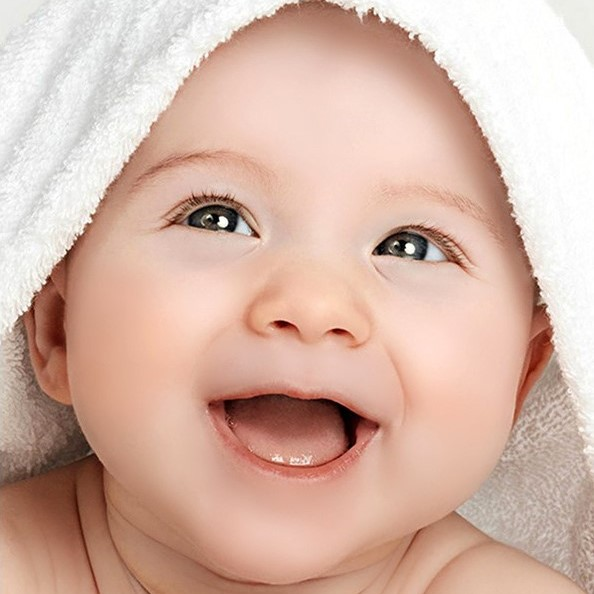

In [ ]:
# Show the image I chose

from IPython.display import Image
Image(filename='E:/Data Mining/DMLab2/Baby.jpg')

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['E:/Data Mining/DMLab2/Baby.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

# The description of the image is excellent!
# The baby is indeed the central figure.
# The baby is smiling and looks happy.
# However, this picture actually does not have a background, it only features the baby in the center with a towel on the baby's head.
# It is correct that the picture does not contain any text.
# In conclusion, this image presents the baby's joyful smile, with a simple composition and background, emphasizing innocence and warmth.

In the image, there is a baby with soft blonde hair and clear blue eyes. The baby's skin is smooth and wrinkle-free, indicating that they are well cared for. A white towel is wrapped snugly around the baby's head, providing comfort and warmth. The baby's mouth is open wide, revealing a tooth or two in their smile. Their eyes are closed, as if they are enjoying the moment or perhaps just taking in the sights and sounds of their surroundings. The background is white and out of focus, drawing attention back to the baby who is the main subject of this image. There are no other objects or text visible in the image. The relative position of the towel suggests it was wrapped around the baby's head before they were captured in this moment. The overall impression is one of warmth and innocence.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
# from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from tqdm import tqdm  # 進度條

llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load()  # We will load the URL that will serve as our data source
    
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    
    # Split documents with progress bar
    print("Splitting documents into chunks...")
    splits = []
    for split in tqdm(text_splitter.split_documents(docs), desc="Chunking"):
        splits.append(split)

    embeddings = OllamaEmbeddings(model=llm_model)  # Generating embeddings with our chosen model
    
    # Creating vectorstore with progress bar
    print("Generating embeddings and creating vectorstore...")
    # vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    vectorstore = FAISS.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

url = "https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    print("Retrieving documents...")
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))


USER_AGENT environment variable not set, consider setting it to identify your requests.


Splitting documents into chunks...


Chunking: 100%|██████████| 22/22 [00:00<?, ?it/s]
C:\Users\ChienYu\AppData\Local\Temp\ipykernel_31644\513134369.py:30: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model)  # Generating embeddings with our chosen model


Generating embeddings and creating vectorstore...
Retrieving documents...


The related solutions from IBM with LLMs are:

1. Watsonx Assistant: This is a product that utilizes the Granite model series as its generative AI backbone, allowing it to assist users with various tasks.
2. Watsonx Orchestrate: Similarly, this product also leverages the Granite model series for generative AI capabilities.
3. watsonx.ai: This is a platform where IBM has launched its Granite model series, which serves as the generative AI backbone for other products like Watsonx Assistant and Watsonx Orchestrate.

These solutions are all part of IBM's efforts to integrate Large Language Models (LLMs) into their products and services to enhance natural language understanding (NLU) and content generation capabilities.


### **Actual content in the URL:**

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from tqdm import tqdm  # Progress bar

llm_model = "llama3.2"  # Specify the LLM model

# Modified function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    all_splits = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load each URL as a separate document
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        
        # Split documents with progress bar
        print(f"Splitting documents from {url} into chunks...")
        for split in tqdm(text_splitter.split_documents(docs), desc="Chunking"):
            all_splits.append(split)

    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings with chosen model
    
    # Create vectorstore with progress bar
    print("Generating embeddings and creating vectorstore...")
    vectorstore = FAISS.from_documents(documents=all_splits, embedding=embeddings)
    return vectorstore.as_retriever()

# List of three Wikipedia URLs for testing
urls = [
    "https://en.wikipedia.org/wiki/Big_data",
    "https://en.wikipedia.org/wiki/Natural_language_generation",
    "https://en.wikipedia.org/wiki/Neural_network_(machine_learning)"
]

# Create the retriever with multiple URLs
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format retrieved docs in an orderly manner

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    print("Retrieving documents...")
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Updated questions to test the RAG system
questions = [
    "What is big data and why is it important in modern technology?",
    "How is natural language generation applied in AI systems?",
    "What are neural networks and how do they work in machine learning?"
]

# Evaluate the RAG chain with sample questions
for question in questions:
    result = rag_chain(question)
    print(f"\nQuestion: {question}\nResponse:\n{result}\n")

Splitting documents from https://en.wikipedia.org/wiki/Big_data into chunks...


Chunking: 100%|██████████| 167/167 [00:00<?, ?it/s]


Splitting documents from https://en.wikipedia.org/wiki/Natural_language_generation into chunks...


Chunking: 100%|██████████| 39/39 [00:00<?, ?it/s]


Splitting documents from https://en.wikipedia.org/wiki/Neural_network_(machine_learning) into chunks...


Chunking: 100%|██████████| 197/197 [00:00<00:00, 199247.14it/s]

Generating embeddings and creating vectorstore...


Retrieving documents...

Question: What is big data and why is it important in modern technology?
Response:
Big data refers to the collection and analysis of large amounts of structured, semi-structured, and unstructured data from various sources, which can be too massive for traditional software tools to handle within a tolerable elapsed time. The four key concepts associated with big data are:

1. **Volume**: Refers to the sheer size of the data set, often measured in terabytes or zettabytes.
2. **Variety**: Encompasses different types of data, such as structured, semi-structured, and unstructured data.
3. **Velocity**: Represents the speed at which data is generated and updated.
4. **Veracity**: Refers to the quality and insightfulness of the data.

Big data analysis presents several challenges, including capturing data, data storage, data analysis, search, sharing, transfer, visualization, querying, updating, information privacy, and data source. To overcome these challenges, organ

In [ ]:
# The first result from the RAG chain is stored in the variable
first_question = "What is big data and why is it important in modern technology?"
first_result = rag_chain(first_question)

print(f"Question: {first_question}\nResponse:\n{first_result}\n")

Retrieving documents...
Question: What is big data and why is it important in modern technology?
Response:
Big data refers to the vast amounts of structured and unstructured data that organizations generate and collect from various sources, such as social media, sensors, and online transactions. The four key concepts associated with big data are:

1. **Volume**: The sheer amount of data being generated, which can be overwhelming for traditional software tools.
2. **Variety**: The diversity of data types, formats, and sources, including unstructured, semi-structured, and structured data.
3. **Velocity**: The speed at which data is generated and collected, often in real-time or near-real-time.
4. **Veracity**: The quality and insightfulness of the data, ensuring that it is accurate, reliable, and relevant.

Big data has become increasingly important in modern technology due to its potential to:

1. **Improve decision-making**: By analyzing large amounts of data, organizations can gain va

In [ ]:
# The second result from the RAG chain is stored in the variable
second_question = "How is natural language generation applied in AI systems?"
second_result = rag_chain(second_question)

print(f"Question: {second_question}\nResponse:\n{second_result}\n")

Retrieving documents...
Question: How is natural language generation applied in AI systems?
Response:
Natural Language Generation (NLG) is applied in AI systems in various ways, particularly in automated dialogue systems like chatbots. Here are some key applications:

1. **Generating responses**: NLG is used to generate human-like responses to user input in chatbots, enabling them to engage in real-time conversations.
2. **Template-based systems**: Simple template-based systems use pre-defined templates to generate form letters, such as automated email responses or customer support messages.
3. **Complex grammar understanding**: More advanced NLG systems can understand human grammar and generate responses that are more nuanced and context-dependent.
4. **Machine learning-based approaches**: Statistical models trained on large corpora of human-written texts can be used to predict and generate text, such as generating news articles or product descriptions.

NLG has a long history, dating

In [ ]:
# The third result from the RAG chain is stored in the variable
third_question = "What are neural networks and how do they work in machine learning?"
third_result = rag_chain(third_question)

print(f"Question: {third_question}\nResponse:\n{third_result}\n")

Retrieving documents...
Question: What are neural networks and how do they work in machine learning?
Response:
I'd be happy to help you understand neural networks and their role in machine learning!

**What are Neural Networks?**

Neural networks are a type of machine learning model inspired by the structure and function of the human brain. They consist of interconnected nodes or "neurons" that process and transmit information. Each neuron receives one or more inputs, performs a computation on those inputs, and then sends the output to other neurons.

**How Do Neural Networks Work?**

The basic components of a neural network are:

1. **Inputs**: These are the external data sources, such as images, documents, or sensor readings.
2. **Weighed Sum**: The input values are combined using weights, which determine how much each input contributes to the overall output.
3. **Bias Term**: A constant value added to the weighted sum to shift the output.
4. **Activation Function**: A nonlinear func

**Comparing Response Accuracy**
 - Big Data
   - Accuracy: According to the information on "Big Data" from Wikipedia, the system's response accurately captured the four key elements of big data: Volume, Variety, Velocity, and Veracity. It also covered big data's role in supporting decision-making, enhancing user experience, and driving innovation, all of which are accurate. Additionally, the system mentioned challenges in data management, analysis, and privacy protection, which aligns with the actual issues associated with big data.
   - Missing: The response was somewhat generalized and lacked in-depth, lesser-known details.
 - Natural Language Generation (NLG)
   - Accuracy: The response generated by RAG (Retrieval-Augmented Generation) covered applications of NLG in AI, including conversational systems and automatic response generation. The description aligns with Wikipedia’s content, mentioning the generation process, the use of statistical models, and template systems in NLG.
   - Missing: This response was rather high-level, whereas Wikipedia offers more technical details, such as the application of deep learning models (e.g., GPT). The response seemed to lack advanced technical specifics.
 - Neural Networks
   - Accuracy: The response explained the basic structure of neural networks (such as input, weighted sum, and activation function) and briefly outlined the training process (backpropagation), consistent with the description in Wikipedia.
   - Missing: The response lacked explanations about different network types (such as convolutional and recurrent neural networks), which are important for a deeper understanding of neural networks. Additionally, while Wikipedia provides examples of how neural networks are applied to real-world problems, the response didn’t include any examples.

 - Advantages of RAG Systems
   - Access to External Knowledge: By querying databases or document collections, RAG systems can directly access large amounts of external knowledge, making responses more comprehensive and accurate. This is especially useful for handling questions involving specialized or up-to-date information.

 - Disadvantages of RAG Systems
   - Dependency on Knowledge Source Quality: The accuracy of RAG systems depends on the completeness and accuracy of their knowledge sources. If the knowledge base is not comprehensive or contains outdated information, the RAG system may not be able to provide the most current or complete answers.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"] # return the embedding vector

In [ ]:
from tqdm import tqdm

tqdm.pandas()

# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings' # df_train
df_train['embeddings'] = df_train.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)

100%|██████████| 3613/3613 [1:44:39<00:00,  1.74s/it]  


In [ ]:
tqdm.pandas()

# Apply the function to the specified column and store the result in a new column 'embeddings' # df_test
df_test['embeddings'] = df_test.progress_apply(lambda row: generate_embeddings(row, column_name), axis=1)

100%|██████████| 347/347 [10:22<00:00,  1.79s/it]


In [ ]:
df_train #We can see the new column with the embeddings 

,id,text,emotion,intensity,text_tokenized,sentence_vector,embeddings
839,10839,Grateful for all the hungry people in my life!...,anger,0.167,"[Grateful, for, all, the, hungry, people, in, ...","[-0.089418806, 0.05046093, -0.05248052, -0.068...","[0.6416501998901367, 1.1114741563796997, 1.260..."
2630,30626,only time I am ever cheering for you Johnny,joy,0.340,"[only, time, I, am, ever, cheering, for, you, ...","[-0.023953807, 0.038886204, -0.03148973, -0.06...","[-1.0665249824523926, -0.2531178295612335, 1.8..."
32,10032,I blame the whole season on Natalie! The seaso...,anger,0.792,"[I, blame, the, whole, season, on, Natalie, !,...","[-0.010474503, 0.040111743, -0.034045618, -0.0...","[-1.9785561561584473, -0.19391728937625885, 0...."
2398,30394,@AimiSyafiqahR go check up with your bf. He'll...,joy,0.500,"[@, AimiSyafiqahR, go, check, up, with, your, ...","[-0.017892778, 0.091336414, -0.03109226, -0.05...","[-0.21021005511283875, 0.8288964033126831, 0.7..."
411,10411,@JasonMillerinDC @realDonaldTrump Prudence sug...,anger,0.500,"[@, JasonMillerinDC, @, realDonaldTrump, Prude...","[-0.017892778, 0.091336414, -0.03109226, -0.05...","[-1.2529277801513672, -0.7390579581260681, 0.0..."
...,...,...,...,...,...,...,...
1130,20273,"@latenightdaryun pfft, as if anyone undergoing...",fear,0.646,"[@, latenightdaryun, pfft, ,, as, if, anyone, ...","[-0.017892778, 0.091336414, -0.03109226, -0.05...","[-1.160428762435913, 0.29397958517074585, 2.58..."
1294,20437,"#NawazSharif says lets end #terror. Sure, let ...",fear,0.554,"[#, NawazSharif, says, lets, end, #, terror, ....","[-0.057571605, 0.06515363, -0.05281084, -0.060...","[-2.6289713382720947, 0.5670530200004578, -0.8..."
860,20003,I feel like I am drowning. #depression #falur...,fear,0.938,"[I, feel, like, I, am, drowning, ., #, depress...","[-0.010474503, 0.040111743, -0.034045618, -0.0...","[-1.2069505453109741, 0.633983314037323, 3.098..."
3507,40680,@pxrfectpeach it's got her little pout,sadness,0.271,"[@, pxrfectpeach, it, 's, got, her, little, pout]","[-0.017892778, 0.091336414, -0.03109226, -0.05...","[0.18090619146823883, -0.2843835651874542, 2.8..."


In [ ]:
df_train.to_csv('E:/Data Mining/DMLab2/df_train.csv', index=False)

In [ ]:
df_test #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings
322,40835,"@Eeevah14 don't I know it, try not to fret my ...",sadness,0.333,"[-0.8650256991386414, -0.7730954885482788, 1.2..."
114,21177,Okay. Brace yourself. I will attempt my first ...,fear,0.792,"[0.7948421835899353, -0.3980497717857361, 2.50..."
325,40838,@GolfStrat out of Rory starts. What would your...,sadness,0.343,"[-0.4657449722290039, 1.5471595525741577, 0.78..."
267,30896,It feels good to get outside for a minute and ...,joy,0.708,"[0.5790172815322876, 2.0620336532592773, -0.15..."
307,40820,MC: what are you listen to these days?\nBogum:...,sadness,0.583,"[-1.6412081718444824, 0.9071463346481323, -1.6..."
...,...,...,...,...,...
188,21251,"Gahh...BT, in queue for 30 minutes.. Now put t...",fear,0.336,"[-0.013912535272538662, -0.25504735112190247, ..."
71,10928,Sting is just too damn earnest for early morni...,anger,0.446,"[-0.041641272604465485, -1.5856949090957642, 0..."
106,21169,The Apocalypse has hit our gym and it's nothi...,fear,0.812,"[-1.1656302213668823, -0.320311576128006, 2.63..."
270,30899,@GigaFag @pipertownsend_ snapchat new would be...,joy,0.396,"[-1.9688739776611328, 0.36688587069511414, -0...."


In [ ]:
df_test.to_csv('E:/Data Mining/DMLab2/df_test.csv', index=False)

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [ ]:
# train the KNN classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels.
# To train the KNN classifier, we need to convert the embeddings to a list.
X_train = df_train["embeddings"].tolist() # The training features
y_train = df_train['emotion'] # The training labels
# Use the text vector to predict the emotion.

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [ ]:
X_test = df_test["embeddings"].tolist() 
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4553314121037464


The accuracy of KNN in this case is quite poor, achieving only 0.455. For our text data, it appears that KNN is not a suitable classification method.

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.39      0.42      0.40        84
        fear       0.52      0.54      0.53       110
         joy       0.45      0.47      0.46        79
     sadness       0.44      0.36      0.40        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.45       347



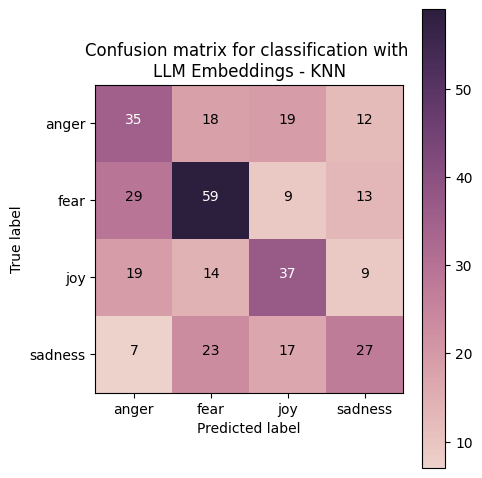

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again  # Feedforward Neural Network
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4 # 4 categories
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('E:/Data Mining/DMLab2/DM2024-Lab2-Master/logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3921 - loss: 1.4110 - val_accuracy: 0.5504 - val_loss: 1.0788
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.8709 - val_accuracy: 0.5533 - val_loss: 1.0999
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.6863 - val_accuracy: 0.5274 - val_loss: 1.2043
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7783 - loss: 0.5749 - val_accuracy: 0.5677 - val_loss: 1.2228
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8283 - loss: 0.4584 - val_accuracy: 0.5821 - val_loss: 1.2096
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3616 - val_accuracy: 0.5648 - val_loss: 1.4239
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.2901 - val_accuracy: 0.5706 - val_loss: 1.4777
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss: 0.2579 - val_accuracy: 0.

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[6.51248515e-01, 9.31795341e-07, 4.23127290e-07, 3.48750144e-01],
       [1.17940793e-03, 9.98820364e-01, 1.16307504e-07, 1.21479573e-07],
       [2.11784989e-02, 6.00244105e-01, 3.86236616e-06, 3.78573567e-01],
       [5.67562566e-08, 4.06837479e-08, 9.99997854e-01, 2.14104671e-06],
       [8.88332129e-01, 3.56302765e-09, 1.93535001e-04, 1.11474320e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'fear', 'joy', 'anger'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.55


For our textual data, the classification performance of NN is better than KNN, achieving an accuracy of 0.55.

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.471353,1.207068,0.550432,1.078837
1,1,0.639911,0.878770,0.553314,1.099873
2,2,0.724329,0.711448,0.527378,1.204347
3,3,0.782452,0.568790,0.567723,1.222792
4,4,0.822585,0.472333,0.582133,1.209639
5,5,0.871575,0.369301,0.564842,1.423886
6,6,0.884307,0.317785,0.570605,1.477675
7,7,0.888458,0.298718,0.556196,1.502678
8,8,0.923609,0.231420,0.564842,1.714259
9,9,0.924993,0.211616,0.561960,1.720922


In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.46      0.62      0.53        84
        fear       0.64      0.60      0.62       110
         joy       0.63      0.52      0.57        79
     sadness       0.49      0.45      0.47        74

    accuracy                           0.55       347
   macro avg       0.56      0.55      0.55       347
weighted avg       0.56      0.55      0.55       347



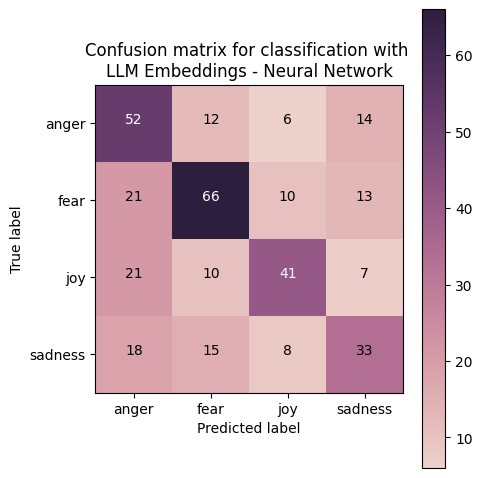

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

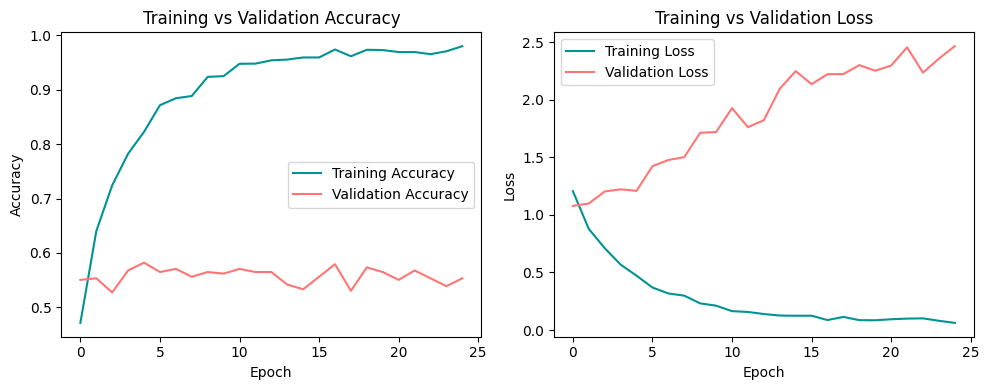

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy', color='#009393')
axs[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='#FF7575')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].set_title('Training vs Validation Accuracy')

axs[1].plot(training_log['epoch'], training_log['loss'], label='Training Loss', color='#009393')
axs[1].plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color='#FF7575')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].set_title('Training vs Validation Loss')

plt.tight_layout()
plt.show()

The NN graphs:

In the Accuracy plot, the plot shows how the accuracy on the training and testing data evolve over time. If both curves improve and converge towards the same value, the model is likely generalizing well, indicating good learning. We observe that as the number of epochs increases, the training accuracy gradually improves, reaching almost 1 towards the end. However, the validation accuracy remains between 0.5 and 0.6 throughout, with the training accuracy noticeably higher than the validation accuracy.

In the Loss plot, the plot shows how well the model fits the training data and the testing data. We observe that the Training Loss decreases as the number of Epochs increases, reaching almost 0 towards the end. In contrast, the Validation loss increases as the number of Epochs increases, reaching almost 1 towards the end.

If the model has good behavior, then the loss will decrease, the accuracy will increase, and both training and validation metrics should converge at similar levels, indicating that the model is generalizing well and not just memorizing the training data.

 - KNN (K-Nearest Neighbors)
   - Simple: Classifies based on distance between the new data point and existing training data.
   - Lazy Learning: No training step. It just stores the data and uses it during prediction.
   - Computationally Expensive: The more data I have, the slower it gets, as it has to compare every new point with all training points.
   - Intuitive: Easy to understand and interpret, as it just looks for similar examples in the training data.
 - Neural Network (NN)
   - Complex: Uses multiple layers to learn patterns in data, adjusting through training.
   - Learning Process: Requires a training phase where it learns from the data using optimization algorithms.
   - Can Handle Complex Problems: Works well with difficult tasks like image recognition or language processing.
   - Flexible: Can learn more complex, non-linear relationships in data compared to simpler models like KNN.

In the graph, the validation accuracy of NN converges more quickly, and the intersection point between the training loss and testing loss occurs earlier.

The KNN model works well on the training data, but it starts overfitting on the validation data. The neural network behaves similarly, while the training accuracy keeps improving, the validation accuracy doesn't keep up, and the loss starts to increase. This likely happens because both models are overfitting the training data and struggling to generalize to new, unseen data.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.44      0.70      0.54        20
        fear       1.00      0.25      0.40        20
         joy       0.54      0.75      0.63        20
     sadness       0.53      0.40      0.46        20

    accuracy                           0.53        80
   macro avg       0.63      0.53      0.51        80
weighted avg       0.63      0.53      0.51        80



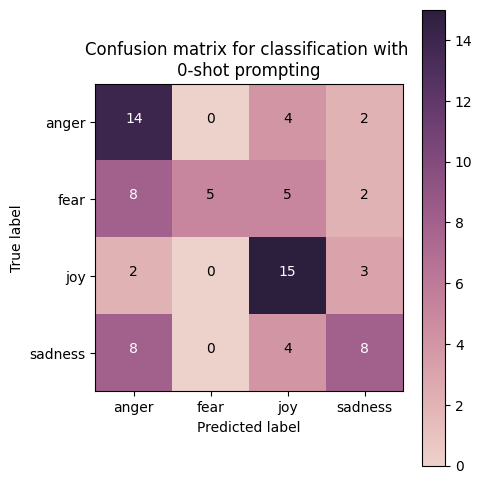

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @cburt43 turn that frown upside down
Emotion: anger

Text: This maybe a new start but it will always be align with the end.  #forward
Emotion: fear

Text: @SenJohnMcCain @WSJ an 'Honorable Senator' cheering when a cease fire does not hold! PEOPLE DIE AND YOU CHEER! GENOCIDE SUPPORT NOT GOOD!
Emotion: joy

Text: @JlKelly1 @FJ_Berry I've got #teampaella presents on their way for you and Fi but I don't think they'll arrive by Saturday sadly!! ;)
Emotion: sadness


Accuracy: 53.75%
              precision    recall  f1-score   support

       anger       0.44      0.85      0.58        20
        fear       1.00      0.25     

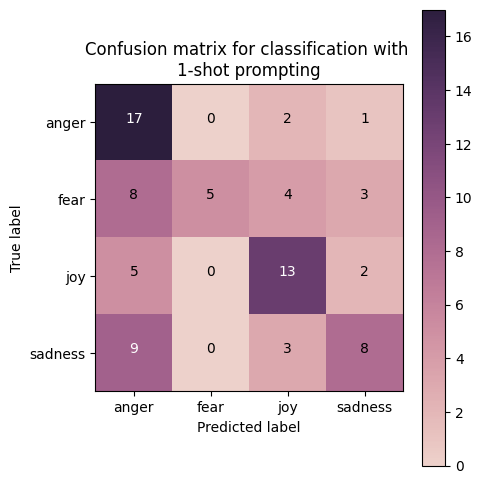

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @cburt43 turn that frown upside down
Emotion: anger

Text: @alyssasimpson21 I gave up KENDRICK LAMAR to eat barbecue with him. #bitter
Emotion: anger

Text: Fuking fuming 😤
Emotion: anger

Text: and naoto nod she also like tha bands. but she also frown. 'Will the bands 'Papa Roach' be at concert...?'
Emotion: anger

Text: Yet we still have deaths, road rage, &amp; violations on the road, despite a widely accepted concept of 'personal accountability' while driving
Emotion: anger

Text: This maybe a new start but it will always be align with the end.  #forward
Emotion: fear

Text: “The #greatest fear #dogs know is the #fear 

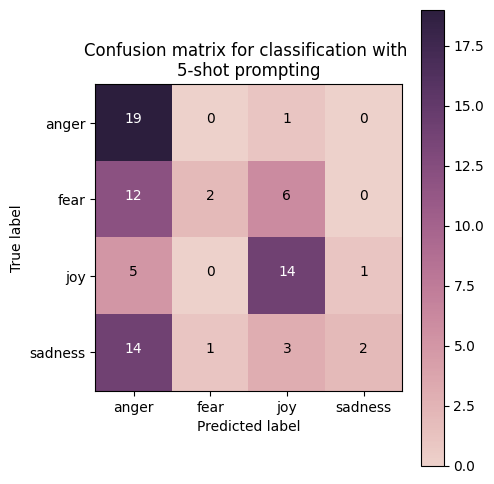

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

 - Zero-shot Classification (Accuracy: 52.50%)\
In the zero-shot scenario, the model relies entirely on what it’s learned before, with no examples to guide it. The accuracy is okay, but for some emotions like "anger" and "joy," it does alright, while "fear" has a low recall (25%). It shows that without examples, the model struggles with distinguishing certain emotions.
Summary: Without examples, the model can still classify, but the results are less stable.
 - 1-shot Classification (Accuracy: 53.75%)\
When we give the model one example for each emotion, the accuracy improves slightly. It works really well for "anger," with a recall of 85%. However, "fear" still isn’t classified well. Overall, providing one example helps the model understand the task better.
Summary: Giving one example per emotion is pretty helpful for the model to understand the features of each emotion, which leads to better accuracy.
 - 5-shot Classification (Accuracy: 46.25%)\
Interestingly, when we give the model five examples per emotion, the accuracy drops. This could be because the model gets confused with too many examples or finds the task more complex, making it harder to clearly differentiate between emotions.

Hence, too many examples might confuse the model, and in this case, more isn’t always better.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---